# Olusola Insurance Company

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

In [2]:
# Load the Universal Olusola Insurance data

Insdata1 = pd.read_csv(r"D:\00 Datasets\Others\Data-04\Olusola Insurance Company\train_data.csv", header=0)
Insdata2 = pd.read_csv(r"D:\00 Datasets\Others\Data-04\Olusola Insurance Company\test_data.csv", header=0)
Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
# Displaying the Insurance dataset information

Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Insdata1_count = Insdata1.Claim.value_counts()
print('Class 0:', Insdata1_count[0])
print('Class 1:', Insdata1_count[1])
print('Proportion:', round(Insdata1_count[0] / Insdata1_count[1], 2), ': 1')
print('Total CC Trans:', len(Insdata1))

Class 0: 5526
Class 1: 1634
Proportion: 3.38 : 1
Total CC Trans: 7160


In [5]:
# Dealing with Duplicate values

Insdata1_dup = Insdata1[Insdata1.duplicated(keep='last')]
Insdata1_dup

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim


In [6]:
for i in Insdata1.columns:
    print(Insdata1[i].value_counts())

H13560    1
H4216     1
H19089    1
H3074     1
H19794    1
         ..
H18936    1
H4240     1
H19400    1
H17286    1
H18076    1
Name: Customer Id, Length: 7160, dtype: int64
2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64
1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.268493       1
0.898630       1
0.887978       1
0.830601       1
0.331507       1
Name: Insured_Period, Length: 401, dtype: int64
0    4973
1    2187
Name: Residential, dtype: int64
V    5382
N    1778
Name: Building_Painted, dtype: int64
N    3608
V    3552
Name: Building_Fenced, dtype: int64
O    3602
V    3551
Name: Garden, dtype: int64
R    3610
U    3550
Name: Settlement, dtype: int64
400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2043, dtype: int64
2    3305
1   

In [7]:
#checking for null values in the train dataset and decide on how to treat them

Insdata1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [8]:
#checking for null values in the test dataset and decide on how to treat them

Insdata2.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

# Data Preparation and Analysis

In [11]:
# Fill null values for garden. "O" which means no garden is the majority.

Insdata1["Garden"].value_counts()

O    3609
V    3551
Name: Garden, dtype: int64

In [10]:
Insdata1["Garden"].fillna("O", inplace=True)
Insdata2["Garden"].fillna("O", inplace=True)

In [12]:
# Building Dimension

Insdata1["Building Dimension"].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2043, dtype: int64

In [13]:
check1 = Insdata1[["Building Dimension", "Settlement"]]
check1.head()

,Building Dimension,Settlement
0,290.0,U
1,490.0,R
2,595.0,U
3,2840.0,U
4,680.0,R


In [14]:
#check which settlement type has majority of the null values
#rural has just 1 while urban has 105
#all null values will be filled with the average of rural building dimensions

check1[check1["Settlement"]=="U"]["Building Dimension"].isnull().sum()

105

In [15]:
check1[check1["Settlement"]=="R"]["Building Dimension"].isnull().sum()

1

In [16]:
#Average size for buildings in urban areas

Fill_Avg_BD  = check1[check1["Settlement"]=="U"]["Building Dimension"].mean()
Fill_Avg_BD

1575.211611030479

In [18]:
# Filling null values for building dimensions

Insdata1["Building Dimension"].fillna(Fill_Avg_BD, inplace=True)
Insdata2["Building Dimension"].fillna(Fill_Avg_BD, inplace=True)

In [19]:
#quick check

Insdata1["Building Dimension"].isnull().sum()

0

In [20]:
Insdata1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [21]:
Insdata2.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [22]:
#check which settlement type has majority of null values
#urban has majority with 507 while rural has just 1
#null values will be filled with the highest occuring date of occupancy from buildings in urban settlement

Train_Fill_DoO = Insdata1[Insdata1["Settlement"]=="U"]["Date_of_Occupancy"].isnull().sum()
Test_Fill_DoO = Insdata2[Insdata2["Settlement"]=="U"]["Date_of_Occupancy"].isnull().sum()
print(Train_Fill_DoO)
print(Test_Fill_DoO)

507
728


In [23]:
# Highest occuring date of occupancy is 1960

date = Insdata1[Insdata1["Settlement"]=="U"]["Date_of_Occupancy"].value_counts().head()
date

1960.0    1468
1980.0    1010
1988.0     481
1950.0       7
1970.0       6
Name: Date_of_Occupancy, dtype: int64

In [24]:
# Filling null values for date_of_Occupancy

Insdata1["Date_of_Occupancy"].fillna(1960, inplace=True)
Insdata2["Date_of_Occupancy"].fillna(1960, inplace=True)

In [25]:
#quick check

Insdata1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [26]:
# Geo_Code
#only buildings in urban areas have null values
#this column would be dropped. I do not think it would impact our model

Insdata1[Insdata1["Settlement"]=="U"]["Geo_Code"].value_counts()

6088     66
21231    63
33063    58
13206    57
6083     56
         ..
6048      1
94028     1
13078     1
69386     1
35236     1
Name: Geo_Code, Length: 832, dtype: int64

In [27]:
# Deleting the 'Geo_Code' variable

Insdata1.drop("Geo_Code",axis=1, inplace=True)
Insdata2.drop("Geo_Code",axis=1, inplace=True)

In [28]:
#the "." here will be treated as null values. And since an overwhelming majority is null, this column will be dropped

Insdata1["NumberOfWindows"].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [29]:
# Delecting the 'NumberOfWindows' variable

Insdata1.drop("NumberOfWindows", axis=1, inplace=True)
Insdata2.drop("NumberOfWindows", axis=1, inplace=True)

In [30]:
Insdata1.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

In [31]:
Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 671.4+ KB


In [32]:
# Convert the 'Date_of_Occupancy' from float value to integer value

Insdata1['Date_of_Occupancy'] = Insdata1['Date_of_Occupancy'].astype(int)

In [33]:
#This function splits Insured period in 2 groups; 
# Over 0.5 will be 1 year policy duration 
# Less than 0.5 will be no policy duration

def insured(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [34]:
# Applying the 'insured' function to convert the 'Insurance_Period' as 0 or 1

Insdata1["Insured_Period"] = Insdata1["Insured_Period"].apply(insured)
Insdata2["Insured_Period"] = Insdata2["Insured_Period"].apply(insured)

In [35]:
Insdata1["Insured_Period"].value_counts()

1    6517
0     643
Name: Insured_Period, dtype: int64

# Exploratory Data Analyis (EDA)

Text(0.5, 1.0, 'No of Claims')

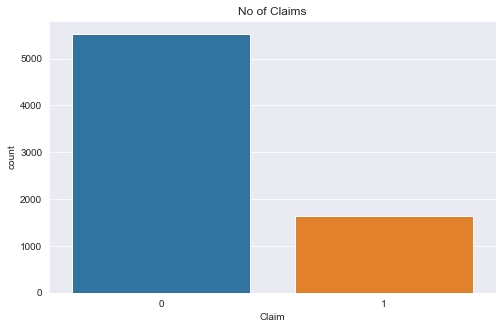

In [36]:
# How many clients have had claims?

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.countplot(x="Claim", data=Insdata1)

plt.title("No of Claims")

Text(0.5, 1.0, 'Building Type')

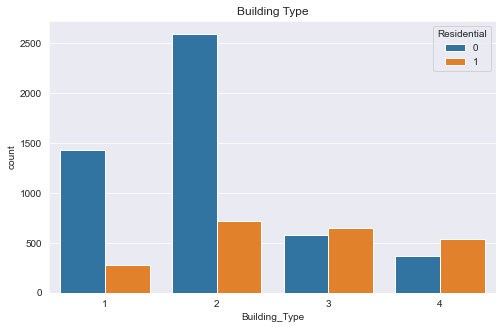

In [37]:
# Distribution of Building Types?

plt.figure(figsize=(8,5))

sns.set_style("darkgrid")
sns.countplot(x="Building_Type", hue="Residential", data=Insdata1)

plt.title("Building Type")

Text(0.5, 1.0, 'Distribution of Buildings')

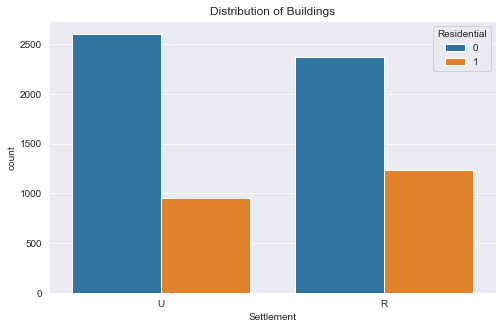

In [38]:
# More (Residential) buildings in Urban areas?

plt.figure(figsize=(8,5))

sns.countplot(x="Settlement", hue="Residential", data=Insdata1)

plt.title("Distribution of Buildings")

In [39]:
# Distribution of Customer by year of occupancy

year = Insdata1.groupby("Date_of_Occupancy")["Customer Id"].count().to_frame().reset_index()
year.head()

,Date_of_Occupancy,Customer Id
0,1545,1
1,1550,1
2,1600,5
3,1613,1
4,1700,10


<AxesSubplot:xlabel='Date_of_Occupancy'>

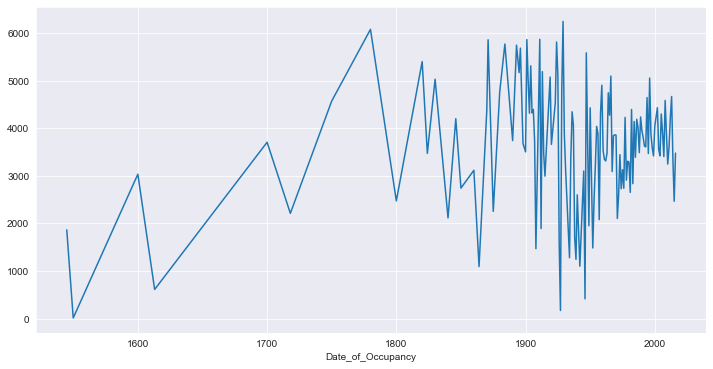

In [40]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Date_of_Occupancy", y=Insdata1.index, data=Insdata1, err_style=None)

# Modelling the Insurance data

In [ ]:
#importing necessary libraries

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
# Import LabelEncoder

from sklearn import preprocessing

#creating labelEncoder

le = preprocessing.LabelEncoder()

In [42]:
#tranforming columns to the data type that the training data can understand
#all data should be integers or floats and not strings

Insdata1["Building_Painted"] =le.fit_transform(Insdata1["Building_Painted"])
Insdata1["Building_Fenced"] =le.fit_transform(Insdata1["Building_Fenced"])
Insdata1["Garden"] =le.fit_transform(Insdata1["Garden"])
Insdata1["Settlement"]=le.fit_transform(Insdata1["Settlement"])

In [43]:
Insdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   int64  
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   int32  
 11  Claim               7160 non-null   int64  
dtypes: float64(1), int32(5), int64(5), object(1)
memory usage: 531.5+ KB


In [45]:
Insdata1.sample(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
1157,H18966,2012,0,0,1,0,0,0,1425.0,2,1950,0
422,H2144,2013,1,0,1,0,0,0,1500.0,4,1975,0
660,H19074,2013,1,0,1,0,0,0,1500.0,1,1979,1
2122,H18895,2015,1,1,1,0,0,0,2470.0,2,2012,0
5600,H14097,2013,0,1,0,1,1,1,3500.0,2,1988,0
788,H18342,2012,1,0,1,0,0,0,1000.0,1,1960,0
3058,H5235,2012,0,0,0,1,1,1,670.0,1,1960,0
4175,H368,2012,1,0,1,1,1,1,580.0,2,1980,0
4555,H12892,2013,1,0,0,1,1,1,132.0,1,1960,0
4156,H18879,2012,0,1,1,0,0,0,1500.0,2,1978,0


In [46]:
Insdata1['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [47]:
# Convert the 'YearOfObservation' variable into numeric 

Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2012], 5)
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2013], 4)
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2014], 3)
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2015], 2)
Insdata1['YearOfObservation'] = Insdata1['YearOfObservation'].replace([2016], 1)

In [48]:
Insdata1['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1303.0      1
907.0       1
2445.0      1
924.0       1
4069.0      1
Name: Building Dimension, Length: 2044, dtype: int64

In [49]:
Insdata1['Building Dimension'].max()

20940.0

In [50]:
Insdata1['Building Dimension'].min()

1.0

In [51]:
# Create Building Dimension ranges

Insdata1['BD_Range'] = pd.cut(x=Insdata1['Building Dimension'], bins=[-1, 500, 1000, 1500, 2500, 5000,
                                                                      10000, 15000, 25000],
                              labels=['<=500', '>500 to <=1000', '>1000 to <=1500', '>1500 to <=2500',
                                      '>2500 to <=5000', '>5000 to <=10000', '>10000 to <=15000',
                                      '>15000 to <=25000'])

In [52]:
Insdata1['Date_of_Occupancy'].value_counts()

1960    2326
1980    1155
1988     530
1900     371
1970     285
        ... 
1923       1
1919       1
1905       1
1914       1
1926       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [53]:
Insdata1['Date_of_Occupancy'].max()

2016

In [54]:
Insdata1['Date_of_Occupancy'].min()

1545

In [55]:
# Create 'Date_of_Occupancy' ranges

Insdata1['DoO_Range'] = pd.cut(x=Insdata1['Date_of_Occupancy'], bins=[1500, 1600, 1700, 1800, 1900, 2000, 2100],
                              labels=['>1500 to <=1600', '>1600 to <=1700', '>1700 to <=1800', '>1800 to <=1900',
                                      '>1900 to <=2000', '>2000 to <=2100'])

In [57]:
# Copy to back-up file

Insdata1_bk = Insdata1.copy()

Insdata1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim,BD_Range,DoO_Range
0,H14663,4,1,0,0,1,1,1,290.0,1,1960,0,<=500,>1900 to <=2000
1,H2037,2,1,0,1,0,0,0,490.0,1,1850,0,<=500,>1800 to <=1900
2,H3802,3,1,0,0,1,1,1,595.0,1,1960,0,>500 to <=1000,>1900 to <=2000
3,H3834,4,1,0,1,1,1,1,2840.0,1,1960,0,>2500 to <=5000,>1900 to <=2000
4,H5053,3,1,0,1,0,0,0,680.0,1,1800,0,>500 to <=1000,>1700 to <=1800


In [58]:
# Create dummy variable for all range values

Insdata1 = pd.get_dummies(Insdata1, columns=['YearOfObservation', 'BD_Range', 'DoO_Range'])
Insdata1.head().T

,0,1,2,3,4
Customer Id,H14663,H2037,H3802,H3834,H5053
Insured_Period,1,1,1,1,1
Residential,0,0,0,0,0
Building_Painted,0,1,0,1,1
Building_Fenced,1,0,1,1,0
Garden,1,0,1,1,0
Settlement,1,0,1,1,0
Building Dimension,290.0,490.0,595.0,2840.0,680.0
Building_Type,1,1,1,1,1
Date_of_Occupancy,1960,1850,1960,1960,1800


In [59]:
# Identify the independt and dependent variables

x = Insdata1.drop(["Claim","Customer Id", "Building Dimension", "Date_of_Occupancy"], axis=1)
y = Insdata1["Claim"]

In [60]:
x.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Type,YearOfObservation_1,YearOfObservation_2,YearOfObservation_3,...,BD_Range_>2500 to <=5000,BD_Range_>5000 to <=10000,BD_Range_>10000 to <=15000,BD_Range_>15000 to <=25000,DoO_Range_>1500 to <=1600,DoO_Range_>1600 to <=1700,DoO_Range_>1700 to <=1800,DoO_Range_>1800 to <=1900,DoO_Range_>1900 to <=2000,DoO_Range_>2000 to <=2100
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 42)

x_test_f1 = x_test.copy()

# SVM - Linear Kernel

In [64]:
# Training the SVM algorithm for classification problem

from sklearn.svm import SVC

Insdata1SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                  probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                  max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=42)

Insdata1SVM = Insdata1SVM.fit(x_train, y_train)

In [65]:
# Predictions with test data

y_pred = Insdata1SVM.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

[[2100   98]
 [ 554  112]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2198
           1       0.53      0.17      0.26       666

    accuracy                           0.77      2864
   macro avg       0.66      0.56      0.56      2864
weighted avg       0.73      0.77      0.72      2864

Accuracy: 77.23 %
Precision: 77.23 %
Recall: 77.23 %
f1-score: 77.23 %
roc_auc_score: 0.562


# SVM - Polynomial Kernel

In [77]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMPoly = SVC(kernel='poly', degree=3, class_weight=None)
Insdata1SVMPoly.fit(x_train, y_train)

# Predicting the values

y_pred2 = Insdata1SVMPoly.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred2) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y_pred2, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y_pred2, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y_pred2, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred2), 3))

[[2137   61]
 [ 583   83]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2198
           1       0.58      0.12      0.20       666

    accuracy                           0.78      2864
   macro avg       0.68      0.55      0.54      2864
weighted avg       0.74      0.78      0.71      2864

Accuracy: 77.51 %
Precision: 77.51 %
Recall: 77.51 %
f1-score: 77.51 %
roc_auc_score: 0.548


# SVM - Gaussian Kernel

In [78]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None)
Insdata1SVMGaussian.fit(x_train, y_train)

# Predicting the values

y_pred3 = Insdata1SVMGaussian.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred3) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y_pred3, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y_pred3, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y_pred3, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred3), 3))

[[2137   61]
 [ 579   87]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2198
           1       0.59      0.13      0.21       666

    accuracy                           0.78      2864
   macro avg       0.69      0.55      0.54      2864
weighted avg       0.74      0.78      0.72      2864

Accuracy: 77.65 %
Precision: 77.65 %
Recall: 77.65 %
f1-score: 77.65 %
roc_auc_score: 0.551


# SVM - Sigmoid Kernel

In [79]:
# Training the SVM algorithm

from sklearn.svm import SVC

Insdata1SVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight=None)
Insdata1SVMSig.fit(x_train, y_train)

# Predicting the values

y_pred4 = Insdata1SVMSig.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y_pred4) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y_pred4, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y_pred4, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y_pred4, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred4), 3))

[[1751  447]
 [ 476  190]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2198
           1       0.30      0.29      0.29       666

    accuracy                           0.68      2864
   macro avg       0.54      0.54      0.54      2864
weighted avg       0.67      0.68      0.68      2864

Accuracy: 67.77 %
Precision: 67.77 %
Recall: 67.77 %
f1-score: 67.77 %
roc_auc_score: 0.541


# Random forest Algorithm

In [73]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

Insdata1RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                    criterion='entropy', max_depth=None, max_features='auto',
                                    max_leaf_nodes=None, max_samples=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, n_estimators=500,
                                    n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                    warm_start=False)

Insdata1RF = Insdata1RF.fit(x_train, y_train)

# Predict the model with test data set

y1_pred = Insdata1RF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[1997  201]
 [ 517  149]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2198
           1       0.43      0.22      0.29       666

    accuracy                           0.75      2864
   macro avg       0.61      0.57      0.57      2864
weighted avg       0.71      0.75      0.72      2864

Accuracy: 74.93 %
Precision: 74.93 %
Recall: 74.93 %
f1-score: 74.93 %
roc_auc_score: 0.566


# Decision Tree algorithm

In [74]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

Insdata1DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                    max_depth=None, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')

Insdata1DT = Insdata1DT.fit(x_train,y_train)

# Predict with test data

y3_pred = Insdata1DT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

[[2014  184]
 [ 534  132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2198
           1       0.42      0.20      0.27       666

    accuracy                           0.75      2864
   macro avg       0.60      0.56      0.56      2864
weighted avg       0.70      0.75      0.71      2864

Accuracy: 74.93 %
Precision: 41.77 %
Recall: 19.82 %
f1-score: 26.88 %
roc_auc_score: 0.557


# Logistic Regression Algorithm

In [75]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

Insdata1LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', 
                                n_jobs=None, penalty='l2', random_state=None,
                                solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Insdata1LR = Insdata1LR.fit(x_train,y_train)

# Predict the model with test data set

y5_pred = Insdata1LR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

[[2116   82]
 [ 554  112]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2198
           1       0.58      0.17      0.26       666

    accuracy                           0.78      2864
   macro avg       0.68      0.57      0.56      2864
weighted avg       0.74      0.78      0.73      2864

Accuracy: 77.79 %
Precision: 77.79 %
Recall: 77.79 %
f1-score: 77.79 %
roc_auc_score: 0.565


# KNN Algorithm

In [76]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

accuracy = []

for a in range(1, 10, 1):
    k = a
    Insdata1KNN = KNeighborsClassifier(n_neighbors=k)
    Insdata1KNN.fit(x_train, y_train)
    y6_pred = Insdata1KNN.predict(x_test)
    print('KNN_K_value = ', a)
    print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%")
    print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
    print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%")
    print("f1-score:", (round(metrics.f1_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
    print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))
    print(confusion_matrix(y_test, y6_pred))
    print('----------------------------------------------------------------------------------------------')

KNN_K_value =  1
Accuracy: 66.97 %
Precision: 66.97 %
Recall: 66.97 %
f1-score: 66.97 %
roc_auc_score: 0.534
[[1732  466]
 [ 480  186]]
----------------------------------------------------------------------------------------------
KNN_K_value =  2
Accuracy: 75.07 %
Precision: 75.07 %
Recall: 75.07 %
f1-score: 75.07 %
roc_auc_score: 0.532
[[2068  130]
 [ 584   82]]
----------------------------------------------------------------------------------------------
KNN_K_value =  3
Accuracy: 71.86 %
Precision: 71.86 %
Recall: 71.86 %
f1-score: 71.86 %
roc_auc_score: 0.552
[[1897  301]
 [ 505  161]]
----------------------------------------------------------------------------------------------
KNN_K_value =  4
Accuracy: 75.38 %
Precision: 75.38 %
Recall: 75.38 %
f1-score: 75.38 %
roc_auc_score: 0.538
[[2070  128]
 [ 577   89]]
----------------------------------------------------------------------------------------------
KNN_K_value =  5
Accuracy: 73.71 %
Precision: 73.71 %
Recall: 73.71 %
f1-sco